# Escola de Dados - Python para inovação cívica

Os dados que usaremos nesse notebook pode ser encontrado em: [Candidatos - 2016](https://dadosabertos.tse.jus.br/dataset/candidatos-2016) e [Candidatos - 2020](https://dadosabertos.tse.jus.br/dataset/candidatos-2020-subtemas) disponível no Portal de Dados Abertos do Tribunal Superior Eleitoral.


Os dados também podem ser encontrados na pasta "Dados" deste repositório.


------
Pontos para aula:

- Quantas candidaturas para a Câmara de Vereadores houveram em cada ano agrupado por gênero ?
- Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?
- Há correlação entre idade, gênero e custo da campanha?
- Visualização gráfica da distribuição da variável DS_COR_RACA em 2020

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [28]:
dados_ap_pa = glob.glob('consulta*.csv')

In [ ]:
print(dados_ap_pa)

In [30]:
lista_df = []

In [ ]:
for dados_estado in dados_ap_pa:
  df_estado  = pd.read_csv( dados_estado, sep=';', encoding='latin_1', na_values=["#NULO#"] )
  lista_df.append(df_estado)

In [37]:
# compara colunas entre dois dataframes
lista_df[0].columns == lista_df[3].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
len(lista_df)

In [45]:
# Soma a informação de todas as planilhas listadas acima
df_completo = pd.concat(lista_df, axis=0, ignore_index=True)

In [48]:
# Total de linhas
df_completo.shape

(48682, 71)

In [ ]:
# Informações do dataframe
df_completo.info()

In [ ]:
# Lista de cargos
df_completo['DS_CARGO'].unique()

In [ ]:
# Lista de situação de candidatos
df_completo['DS_DETALHE_SITUACAO_CAND'].unique()

In [61]:
# Listando cargos de verador
filtro_cargo = df_completo['DS_CARGO'] == 'VEREADOR'

In [ ]:
filtro_cargo

In [62]:
# Apenas pedidos deferidos
filtro_deferimento_1 = df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO'

In [64]:
# Apenas pedidos deferidos com recurso
filtro_deferimento_2 = df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO'

In [70]:
# Filtrando vereadores com pedidos deferidos ou deferidos com recurso
df_vereadores = df_completo[filtro_cargo & ( filtro_deferimento_1 | filtro_deferimento_2 )].copy()

In [ ]:
# Total de linhas
df_vereadores.shape

In [ ]:
df_vereadores.head()

# Quantas candidaturas, para Câmara de Vereadores, houveram em cada ano agrupado por gênero ?

In [74]:
# Podando o dataframe vereadores com colunas necessárias
df_raca_genero = df_vereadores[['ANO_ELEICAO','CD_CARGO', 'SG_UF', 'NR_PARTIDO', 'SG_PARTIDO', 'CD_GENERO', 'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA', 'NR_IDADE_DATA_POSSE','VR_DESPESA_MAX_CAMPANHA']].copy()

In [ ]:
df_raca_genero.shape

In [79]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2020,13,AP,11,PP,2,MASCULINO,2,PRETA,44.0,12307.75
1,2020,13,AP,13,PT,2,MASCULINO,3,PARDA,63.0,24149.88
2,2020,13,AP,55,PSD,2,MASCULINO,2,PRETA,42.0,12307.75
4,2020,13,AP,12,PDT,2,MASCULINO,3,PARDA,42.0,12307.75
5,2020,13,AP,17,PSL,2,MASCULINO,3,PARDA,25.0,151743.76


In [92]:
# Resultado
# Equivale à select count(ANO_ELEICAO), count(DS_GENERO), count(CD_CARGO) from df_raca_genero group by ANO_ELEICAO, DS_GENERO
agrupamento_ano_genero = df_raca_genero[['ANO_ELEICAO', 'DS_GENERO', 'CD_CARGO']].groupby(by=['ANO_ELEICAO','DS_GENERO']).count()

In [93]:
agrupamento_ano_genero

CD_CARGO
ANO_ELEICAO DS_GENERO          
2016        FEMININO       6305
            MASCULINO     13348
2020        FEMININO       8021
            MASCULINO     15068

In [ ]:
# Usando matplotlib para imprimir resultados em forma de gráfico de barra
df_raca_genero.groupby(['ANO_ELEICAO', 'DS_GENERO']).sum().unstack(0).plot(kind='bar')

# Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?

In [109]:
cortes = [18,25,35,45,55,65,100]

In [103]:
categorias = ['18 a 24 anos', '25 a 34 anos', '35 a 44 anos', '45 a 54 anos', '55 a 64 anos', 'acima de 64 anos']

In [110]:
df_raca_genero['FAIXA_ETARIA'] = pd.cut(df_raca_genero['NR_IDADE_DATA_POSSE'], cortes, labels=categorias)

In [ ]:
df_raca_genero['FAIXA_ETARIA'].mode()

# Visualize graficamente a distribuição da variável DS_COR_RACA em 2020

In [118]:
df_raca_2020 = df_raca_genero[df_raca_genero['ANO_ELEICAO'] == 2020].copy()

In [ ]:
df_raca_2020[['CD_COR_RACA','DS_COR_RACA']].groupby(('DS_COR_RACA')).count()

In [121]:
# Listando as raças existentes
raca = df_raca_2020['DS_COR_RACA'].unique().tolist()
raca

In [ ]:
# Listando a quantidade de candidatos por raça
frequencia = df_raca_2020['DS_COR_RACA'].value_counts(sort=False).tolist()
frequencia

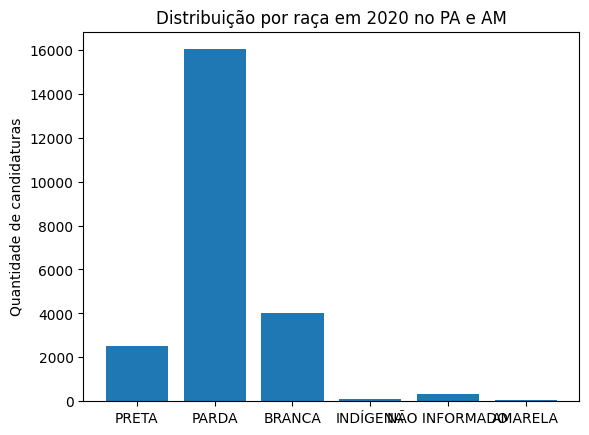

In [132]:
plt.bar(raca, frequencia)
plt.xticks()
plt.title('Distribuição por raça em 2020 no PA e AM')
plt.ylabel('Quantidade de candidaturas')
plt.show()

# Há correlação entre idade, gênero e custo da campanha?

In [135]:
# Utilizamos o método de pearson
df_raca_genero[['NR_IDADE_DATA_POSSE', 'CD_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].corr(method='pearson')

,NR_IDADE_DATA_POSSE,CD_GENERO,VR_DESPESA_MAX_CAMPANHA
NR_IDADE_DATA_POSSE,1.000000,-0.091149,0.071978
CD_GENERO,-0.091149,1.000000,-0.014853
VR_DESPESA_MAX_CAMPANHA,0.071978,-0.014853,1.000000


In [ ]:
# Não existe correlação